<a href="https://colab.research.google.com/github/tajbirahmed143/Problem-set-1-map2192/blob/main/Random_Walk_MNIST_Problem_Set_1_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load MNIST

## Part 1.a Load MNIST and show montage

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from skimage.util import montage
from skimage.io import imread

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(7, 7)
    plt.show()
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
# #MNIST
train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 25072645.35it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 85427146.56it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 26363627.83it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20074319.04it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



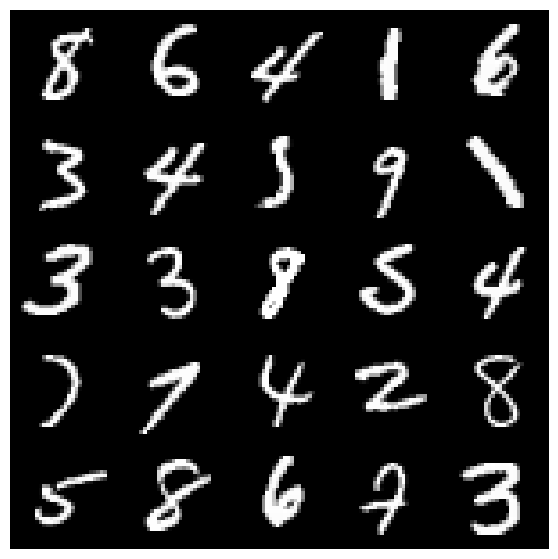

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X.shape
montage_plot(X[125:150,0,:,:])

In [ ]:
## Run random y=mx model on MNIST
X = X.reshape(X.shape[0],784)                    #Reshape image data tensor from (60000, 1, 28, 28) to (60000, 784)
X_test = X_test.reshape(X_test.shape[0],784)     #Reshape image test data tensor from (60000, 1, 28, 28) to (60000, 784)
X.shape

(60000, 784)

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [ ]:
X.shape

torch.Size([60000, 784])

In [ ]:
X = X.T

In [ ]:
X.shape

torch.Size([784, 60000])

In [ ]:
x = X[:,0:1]
x.shape
M = GPU(np.random.rand(10,784))
y = M@x
batch_size = 64

x = X[:,0:batch_size]

M = GPU(np.random.rand(10,784))

y = M@x

y = torch.argmax(y,0)

torch.sum((y == Y[0:batch_size]))/batch_size


tensor(0.1719, device='cuda:0')

In [ ]:
m_best = 0
acc_best = 0

for i in range(100000):

    step = 0.0000000001

    m_random = GPU_data(np.random.randn(10,784))

    m = m_best  + step*m_random

    y = m@X

    y = torch.argmax(y, axis=0)

    acc = ((y == Y)).sum()/len(Y)


    if acc > acc_best:
        print(acc.item())
        m_best = m
        acc_best = acc

0.05976666882634163
0.07271666824817657
0.08341667056083679
0.10423333197832108
0.1086166650056839
0.10954999923706055
0.11873333156108856
0.12136666476726532
0.1266833394765854
0.12796667218208313
0.13026666641235352
0.13246667385101318
0.13795000314712524
0.14000000059604645
0.14633333683013916
0.15594999492168427
0.1616666615009308
0.16241666674613953
0.16615000367164612
0.1827833354473114
0.19511666893959045
0.19823333621025085
0.2038833349943161
0.2049500048160553
0.20688334107398987
0.21700000762939453
0.23091666400432587
0.2530166804790497
0.2577666640281677
0.26001667976379395
0.2705666720867157
0.2746500074863434
0.2770499885082245
0.2774166762828827
0.2784166634082794
0.29503333568573
0.2959499955177307
0.30149999260902405
0.3019166588783264
0.30300000309944153
0.30401667952537537
0.30621665716171265
0.3086666762828827
0.3101833462715149
0.31021666526794434
0.31413334608078003
0.3208500146865845
0.32464998960494995
0.326116681098938
0.3275666832923889
0.33106666803359985
0.33